# Project Title: Sales Data Analysis

## Background

Company performance is an important factor in ensuring business continuity through increased profits and sales. Historical transaction data—including products purchased, customer city of origin, and consumer identity—forms the basis for developing the right strategy. Through analysis of this data, companies can understand consumer behavior, identify the most popular products, and determine the optimal steps to improve business performance.

## Analysis Purpose
The purpose of this project is to identify the annual trends of sales and profit, understand which categories and sub-categories are most frequently purchased by consumers, and determine which product categories contribute the most to the company’s overall profit.
## Business Questions


1.   Which Customer Segments Frequently Make Transactions?
2.   Which Categories of Products do Consumers Frequently Purchase?
3.   Which Sub Categories of Products do Consumers Frequenly Purchase?
4.   How are the Sales and Profit Trending Each Year?
5.   Which Product Category Contributes the Most to the Company's Profits?
6.   Which Cities Perform Transactions Frequently?
7.   Which Catgeory of Products Has the Highest Number of Sales?


## Dataset
Source:[ Dataset](https://www.kaggle.com/datasets/keyizhang14/superstore)


# Preparation

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [ ]:
Superstore = pd.read_csv('/content/Superstore.csv', encoding='latin-1')
Superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Data Understanding

In [ ]:
Superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
Superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
Superstore.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
Superstore.duplicated().sum()

np.int64(0)

# Data Preprocessing

## Transform Data Type

In [ ]:
Superstore['Order Date']=pd.to_datetime(Superstore['Order Date'], dayfirst=True)
Superstore['Ship Date']=pd.to_datetime(Superstore['Ship Date'], dayfirst=True)

## Add new column

In [ ]:
EDA=Superstore.copy()

In [ ]:
EDA['Year']=EDA['Order Date'].dt.year
EDA['Month']=EDA['Order Date'].dt.month

In [ ]:
Customer_segment=EDA.groupby(by=['Segment']).agg({
    "Customer Name":"nunique"
})

# EDA

## Which Customer Segments Frequently Make Transactions?

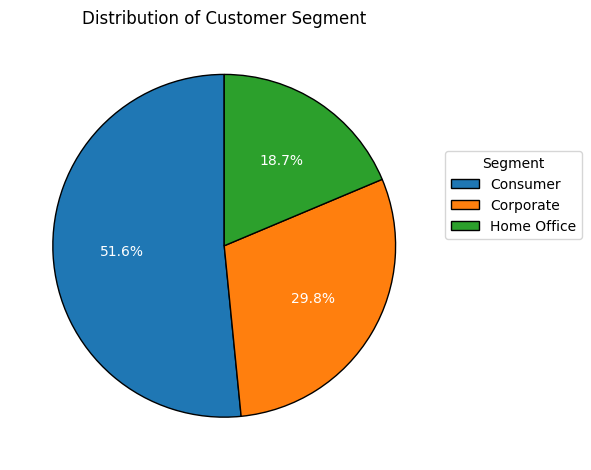

In [ ]:
labels=Customer_segment.index
sizes=Customer_segment['Customer Name']

legend_labels=[f"{label}" for label in labels]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor':'black'},
    textprops={'color':'white'}
)

plt.legend(
    legend_labels,
    title='Segment',
    loc='lower left',
    bbox_to_anchor=(1,0.5),
)
plt.title('Distribution of Customer Segment')
plt.tight_layout()
plt.show()

### Insight

Based on the visualization above, it can be concluded that the customer segment dominated transactions during 2011-2014. This can be seen from the graph, which that more than half of transactions were made by the customer segment and the second segment is corporate segment



### Which Categories of Products do Consumers Frequently Purchase?

In [ ]:
customer_category=EDA.groupby(by=['Category']).agg({
    "Order ID":"count"
})

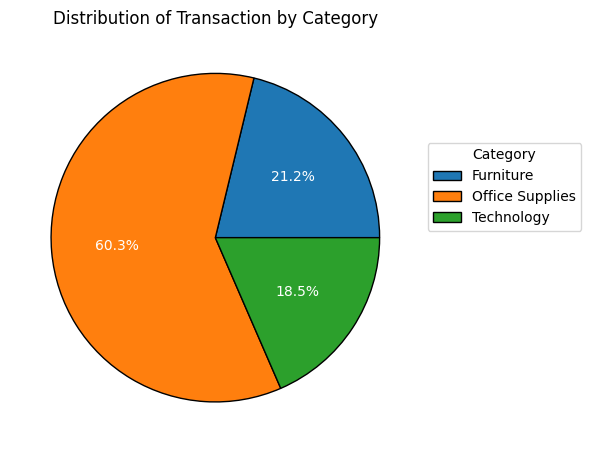

In [ ]:
labels=customer_category.index
sizes=customer_category['Order ID']
legend_labels=[f"{label}" for label in labels]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    autopct="%1.1f%%",
    wedgeprops={'edgecolor':'black'},
    textprops={'color':'white'}
)
plt.legend(
    legend_labels,
    title='Category',
    loc='lower left',
    bbox_to_anchor=(1,0.5)
)
plt.title('Distribution of Transaction by Category')
plt.tight_layout()
plt.show()

### Insight
Based on the visualization above, it can be concluded that the product category most frequently purchased by consumers is "Office Suplies", indicating that consumers prefer to buy office equipment 60.3% of the time. In addiction, the category that consumers prefer to buy less often is Technology, indicating that consumers prioritize office supplies than technology

## Which Sub Categories of Products do Consumers Frequenly Purchase?

In [ ]:
customer_subcategory=EDA.groupby(by=['Sub-Category']).agg({
    "Order ID":"count"
}).sort_values(by='Order ID', ascending=True)

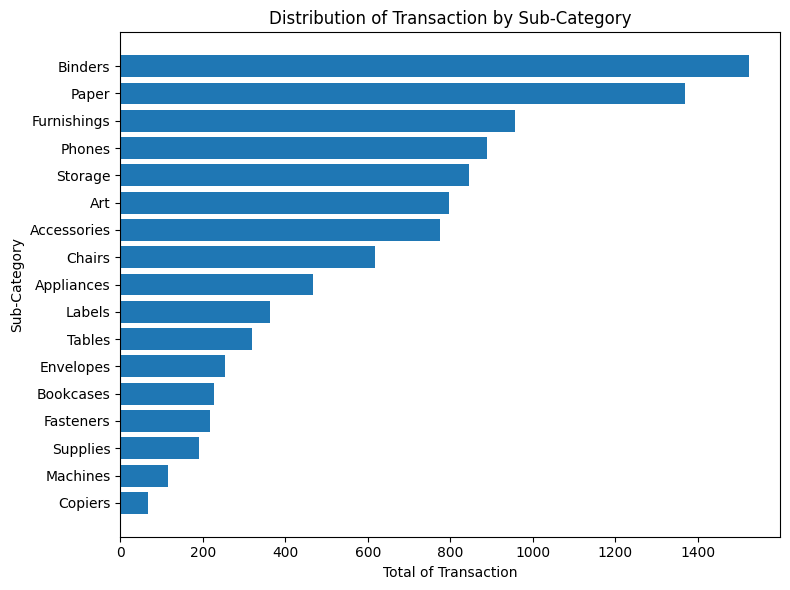

In [ ]:
plt.figure(figsize=(8,6))
plt.barh(customer_subcategory.index, customer_subcategory['Order ID'])
plt.xlabel('Total of Transaction')
plt.ylabel('Sub-Category')
plt.title('Distribution of Transaction by Sub-Category')
plt.tight_layout()
plt.show()

### Insight

Based on the graph above, it can be seen that the most frequently ordered subcategories are Binders and Paper, both of which fall under the Office Supplies category. In addition, Furnishings ranks third and falls under the Furniture category, although there is a significant difference compared to Binders and Paper. Meanwhile, the Phones subcategory ranks next and is part of the Technology category.

## How are the Sales and Profit Trending Each Year?

In [ ]:
sale_profit=EDA.groupby(by=['Year']).agg({
  'Sales':'sum',
  'Profit':'sum'
})

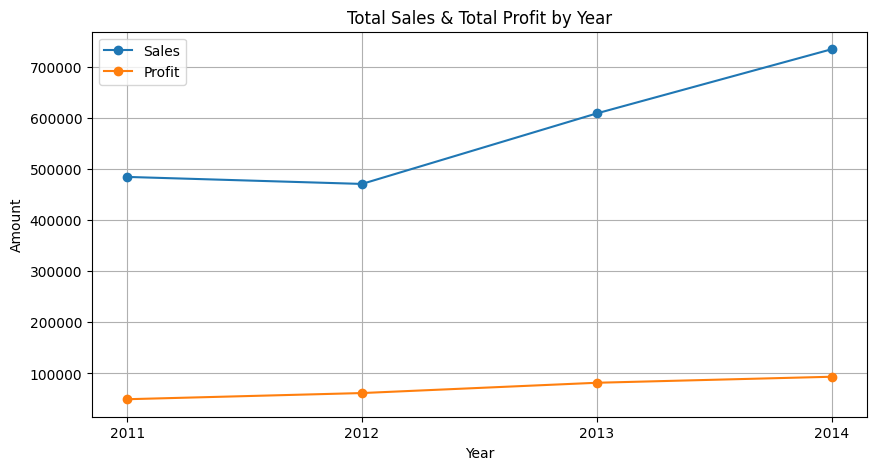

In [ ]:
sale_profit=sale_profit.reset_index()

plt.figure(figsize=(10,5))
plt.plot(sale_profit['Year'], sale_profit['Sales'], marker='o',label='Sales')
plt.plot(sale_profit['Year'], sale_profit['Profit'], marker='o', label='Profit')

plt.title('Total Sales & Total Profit by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.grid(True)
plt.legend()
plt.xticks(sale_profit['Year'])
plt.show()

### Insight
Based on the visualization above, it can be concluded that the company's profits have increased over the years. In addiction, the company's total sales have also increased, although total sales in 2011-2012 experinced a slight decline, but after that total sales increase

## Which Product Category Contributes the Most to the Company's Profits?

In [ ]:
Profit_by_Category=EDA.groupby(by=['Category']).agg({
    "Profit":"sum"
})

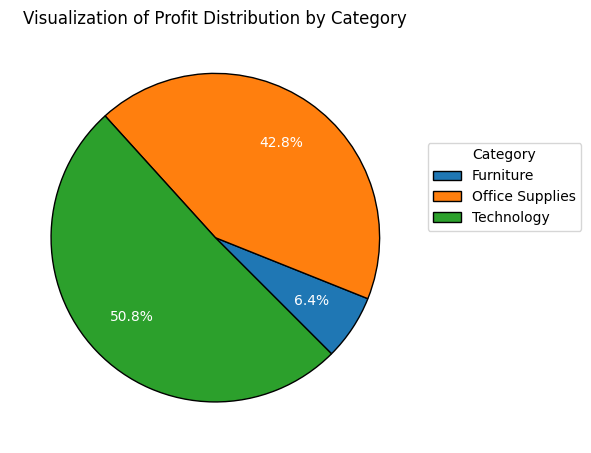

In [ ]:
labels=Profit_by_Category.index
sizes=Profit_by_Category['Profit']

legend_labels=[f"{label}" for label in labels]

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    autopct='%1.1f%%',
    startangle=-45,
    wedgeprops={'edgecolor':'black'},
    textprops={'color':'white'},
    pctdistance=0.7
)

plt.legend(
    legend_labels,
    title='Category',
    loc='lower left',
    bbox_to_anchor=(1,0.5)
)
plt.title('Visualization of Profit Distribution by Category')
plt.tight_layout()
plt.show()

### Insight
Based on the graph above, it can be concluded that the Technology category contributes the most to the company's profit, which is around 50.8%, indicating that this category is the main driver of the company's profit. Meanwhile, the Office Supplies category contributes around 44.2%, showing that this category also plays an important role in supporting the company's profit.On the other hand, the Furniture category only contributes around 4.7%, indicating that this category has a smaller profit margin or less optimal sales performance compared to other categories.


#

## Which Cities Perform Transactions Frequently?

In [ ]:
City_analysis=EDA.groupby(by=['City']).agg({
    "Order ID":"count"
}).sort_values(by='Order ID', ascending=False).head(10)


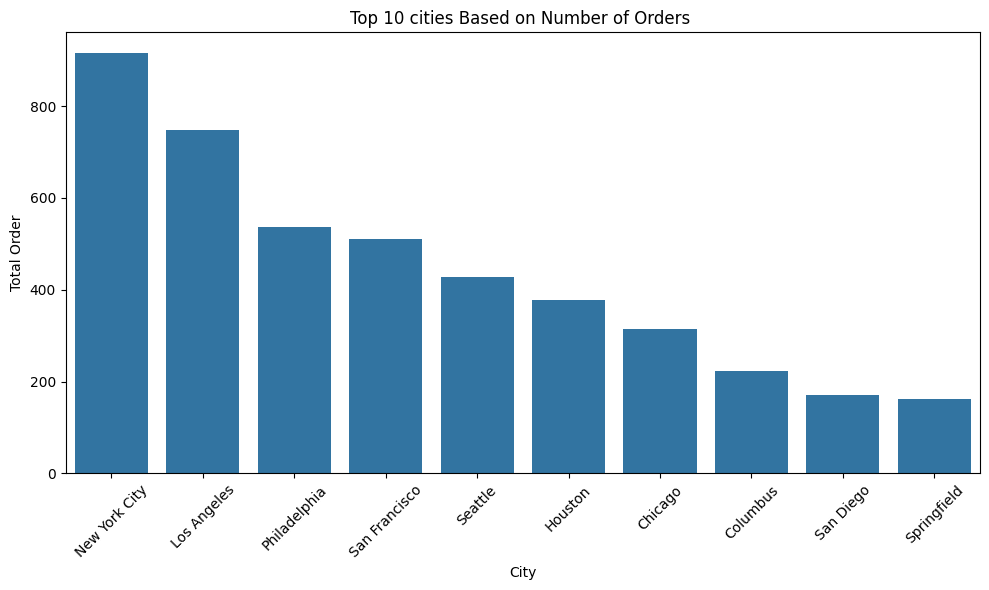

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=City_analysis.reset_index(),
    x='City',
    y='Order ID'
)
plt.title('Top 10 cities Based on Number of Orders ')
plt.xlabel('City')
plt.ylabel('Total Order')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insight

Based on the graph above, of the top 10 cities wiith the highest number of transactions, New York takes first place, followed by Los Angeles in second place and Philadelphia in third place. Although there is a siginificant difference between Philadelphia with New York City and Los Angeles. these three cities can be concluded as the cities with the largest contribution and are the centers of transaction activity.  Meanwhile, the smallest city in terms of transactions among the top 10 cities is Springfield.

Which Catgeory of Products Has the Highest Number of Sales?

In [ ]:
Category_by_Quantity=EDA.groupby(by=['Category']).agg({
    'Quantity':'sum'
}).sort_values(by='Quantity', ascending=False)

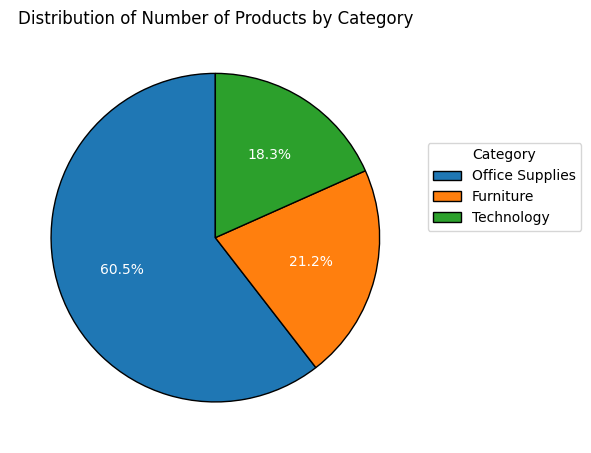

In [ ]:
labels=Category_by_Quantity.index
sizes=Category_by_Quantity['Quantity']

legend_labels=[f"{label}" for label in labels]
plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    autopct='%1.1f%%',
    wedgeprops={'edgecolor':'black'},
    textprops={'color':'white'},
    startangle=90
)
plt.legend(
    legend_labels,
    title='Category',
    loc='lower left',
    bbox_to_anchor=(1,0.5)
)
plt.title('Distribution of Number of Products by Category')
plt.tight_layout()
plt.show()

### Insight:

Based on the graph above, it can be concluded that the Office Supplies category contributed 60.5%. This shows that the number of products sold in this category was the highest compared to other categories.

Meanwhile, the Furniture and Technology categories contributed 21.2% and 18.3% respectively, indicating that both categories still contribute to total sales, although not as much as the Office Supplies category.
